In [1]:
import sqlite3
import pandas as pd
import numpy as np

# Read crawled data

In [2]:
crawled_df = pd.read_csv('Q1_Mudah_PropAds.csv')
crawled_df.head()

,list_title,url,price,area,category,prop_type,prop_title1,prop_title2,bedrooms,bathroom,facilities,size,size_unit
0,New Luxury Freehold Residence 4min Walk to Mid...,https://www.mudah.my/New+Luxury+Freehold+Resid...,597000,Mid Valley City,Apartments,Condo / Services residence / Penthouse / Townh...,Freehold,Non Bumi Lot,1.0,2.0,NaN,689.0,sq.ft.
1,Sri Putramas 1 1100sqft Jalan Kuching Below Ma...,https://www.mudah.my/Sri+Putramas+1+1100sqft+J...,405000,Jalan Kuching,Apartments,Condo / Services residence / Penthouse / Townh...,Freehold,Non Bumi Lot,3.0,2.0,"Swimming Pool, Gymnasium, Tennis Court, Squash...",1100.0,sq.ft.
2,0% DOWNPAYMENT Arena Green 750SF Bukit Jalil [...,https://www.mudah.my/0+DOWNPAYMENT+Arena+Green...,320000,Bukit Jalil,Apartments,Condo / Services residence / Penthouse / Townh...,Freehold,Non Bumi Lot,3.0,2.0,"Mini Market, Playground, Jogging Track, 24 Hou...",878.0,sq.ft.
3,[Duplex Penthouse] Silk Residence Duplex Doubl...,https://www.mudah.my/+Duplex+Penthouse+Silk+Re...,900000,Cheras,Apartments,Condo / Services residence / Penthouse / Townh...,Freehold,Non Bumi Lot,6.0,7.0,"Swimming Pool, Gymnasium, Mini Market, Playgro...",4177.0,sq.ft.
4,BELOW MARKET!! Menara D'Sara Condo Sri Damansa...,https://www.mudah.my/BELOW+MARKET+Menara+D+Sar...,380000,Sri Damansara,Apartments,Condo / Services residence / Penthouse / Townh...,Freehold,Non Bumi Lot,3.0,2.0,"Swimming Pool, Gymnasium, Tennis Court, Squash...",1130.0,sq.ft.


In [3]:
crawled_df.columns

Index(['list_title', 'url', 'price', 'area', 'category', 'prop_type',
       'prop_title1', 'prop_title2', 'bedrooms', 'bathroom', 'facilities',
       'size', 'size_unit'],
      dtype='object')

# Create SQLite3 file

In [4]:
import os
import sqlite3

db_path = 'Q2_sqlite3_data.db'
if os.path.exists(db_path):
    os.remove(db_path)

conn = sqlite3.connect(db_path)
conn.close()

# Define Tables
We want our database to have 1 fact table and 5 dimension tables:
* Listings (Fact Table)
* Category (Dimension)
* Area (Dimension)
* prop_type (Dimension)
* size_unit (Dimension)
* prop_title (Dimension)

### Create Area dimension table

In [5]:
print(crawled_df['area'].unique())
areaID_table = pd.DataFrame([[i, x.strip()] for i, x in enumerate(crawled_df['area'].unique(),1)], columns=['areaID', 'area']).set_index('areaID')
display(areaID_table.head())

# save into sqlite3
with sqlite3.connect(db_path) as conn:
    c = conn.cursor()

    # Create table
    c.execute('''CREATE TABLE area
                 (areaID int NOT NULL PRIMARY KEY, area text)''')

    areaID_table.to_sql(name='area', con=conn, if_exists='append')

['Mid Valley City' 'Jalan Kuching' 'Bukit Jalil' 'Cheras' 'Sri Damansara'
 'Pandan Indah' 'Taman Desa' 'Kuchai Lama' 'Sungai Besi' 'Bangsar'
 'Others' 'Kepong' 'KL City' 'Setiawangsa' 'Wangsa Maju' 'Jalan Ampang'
 'Desa Petaling' 'Setapak' 'Old Klang Road' 'Jalan Ipoh' 'KL Sentral'
 'Pandan Jaya' 'Taman Melawati' 'Sentul' 'Bangsar South' 'Ampang Hilir'
 'Desa Pandan' 'KLCC' 'City Centre' 'Bandar Menjalara' 'Sri Petaling'
 'Mont Kiara' 'Damansara Heights' 'Serdang' 'Sri Hartamas' 'Salak Selatan'
 'Gombak' 'Puchong' 'Keramat' 'OUG' 'Damansara' 'Bukit Bintang' 'Segambut'
 'Pandan Perdana']


,area
areaID,
1,Mid Valley City
2,Jalan Kuching
3,Bukit Jalil
4,Cheras
5,Sri Damansara


### Create Property Type dimension table

In [6]:
print(crawled_df['prop_type'].unique())
prop_typeID_table = pd.DataFrame([[i, x.strip()] for i, x in enumerate(crawled_df['prop_type'].unique(),1)], columns=['prop_typeID', 'prop_type']).set_index('prop_typeID')
display(prop_typeID_table.head())

# save into sqlite3
with sqlite3.connect(db_path) as conn:
    c = conn.cursor()

    # Create table
    c.execute('''CREATE TABLE 'property_type'
                 (prop_typeID int NOT NULL PRIMARY KEY, prop_type text)''')
    
    prop_typeID_table.to_sql(name='property_type', con=conn, if_exists='append')

['Condo / Services residence / Penthouse / Townhouse' 'Apartment/ Flat'
 'Double storey' 'Shop lot' 'Single storey' 'Office space'
 'Two and a half storey' 'Bungalow / Villa / Cluster houses'
 'Semi detached' 'Triple storey' 'Townhouse' 'Agricultural']


,prop_type
prop_typeID,
1,Condo / Services residence / Penthouse / Townh...
2,Apartment/ Flat
3,Double storey
4,Shop lot
5,Single storey


### Create Size_unit Type dimension table

In [7]:
print(crawled_df['size_unit'].unique())
size_unitID_table = pd.DataFrame([[i, x.strip()] for i, x in enumerate(crawled_df['size_unit'].unique(),1)], columns=['size_unitID', 'size_unit']).set_index('size_unitID')
display(size_unitID_table.head())


# save into sqlite3
with sqlite3.connect(db_path) as conn:
    c = conn.cursor()

    # Create table
    c.execute('''CREATE TABLE size_unit
                 (size_unitID int NOT NULL PRIMARY KEY, size_unit text)''')
    
    size_unitID_table.to_sql(name='size_unit', con=conn, if_exists='append')

['sq.ft.' 'Acres']


,size_unit
size_unitID,
1,sq.ft.
2,Acres


### Create Property Title1 and Title 2 dimension table

In [8]:
print(crawled_df['prop_title1'].unique())
prop_title1ID_table = pd.DataFrame([[i, x.strip()] for i, x in enumerate(crawled_df['prop_title1'].unique(),1)], columns=['prop_title1ID', 'prop_title1']).set_index('prop_title1ID')
display(prop_title1ID_table.head())
# save into sqlite3
with sqlite3.connect(db_path) as conn:
    c = conn.cursor()

    # Create table
    c.execute('''CREATE TABLE prop_title1
                 (prop_title1ID int NOT NULL PRIMARY KEY, prop_title1 text)''')
    
    prop_title1ID_table.to_sql(name='prop_title1', con=conn, if_exists='append')

['Freehold' 'Leasehold']


,prop_title1
prop_title1ID,
1,Freehold
2,Leasehold


In [9]:
print(crawled_df['prop_title2'].unique())
prop_title2ID_table = pd.DataFrame([[i, x.strip()] for i, x in enumerate(crawled_df['prop_title2'].unique(),1)], columns=['prop_title2ID', 'prop_title2']).set_index('prop_title2ID')
display(prop_title2ID_table.head())
# save into sqlite3
with sqlite3.connect(db_path) as conn:
    c = conn.cursor()

    # Create table
    c.execute('''CREATE TABLE prop_title2
                 (prop_title2ID int NOT NULL PRIMARY KEY, prop_title2 text)''')
    
    prop_title2ID_table.to_sql(name='prop_title2', con=conn, if_exists='append')

['Non Bumi Lot' 'Bumi Lot' 'Malay Reserved']


,prop_title2
prop_title2ID,
1,Non Bumi Lot
2,Bumi Lot
3,Malay Reserved


### Create Category dimension table

In [10]:
categoryID_table = crawled_df.groupby(['category','prop_type'])['url'].count().reset_index().iloc[:,:2].merge(prop_typeID_table.reset_index()).drop('prop_type', axis=1)
categoryID_table['categoryID'] = range(1, len(categoryID_table)+1)
categoryID_table.set_index('categoryID', inplace=True)
display(categoryID_table.head())


with sqlite3.connect(db_path) as conn:
    c = conn.cursor()

    # Create table
    c.execute('''CREATE TABLE category
                 (categoryID int NOT NULL PRIMARY KEY, category text, prop_typeID int,
                 FOREIGN KEY (prop_typeID) REFERENCES property_type(prop_typeID))''')
    
    categoryID_table.to_sql(name='category', con=conn, if_exists='append')

,category,prop_typeID
categoryID,,
1,Apartments,2
2,Apartments,1
3,Commercial,6
4,Commercial,4
5,Houses,8


### Create fact table for Mudah Property Ads

In [11]:
# Convert facilities into one-hot encodings
facilities_list = np.unique([x for row in crawled_df['facilities'].astype(str).unique() for x in row.split(', ') if len(x) > 1])
facilities_list = facilities_list[facilities_list != 'Gymnasium,']
for item in facilities_list:
    crawled_df[item] = (crawled_df['facilities'].str.find(item)>= 0)
crawled_df = crawled_df.rename(columns={'nan':'No Facilities'}).drop('facilities', axis=1)

In [12]:
fact_table = crawled_df.copy()
for dimension in [prop_title1ID_table, prop_title2ID_table, areaID_table, prop_typeID_table, size_unitID_table]:
    fact_table = fact_table.merge(dimension.reset_index()).drop(dimension.columns[0],axis=1)
    

fact_table = fact_table.merge(categoryID_table.reset_index(), on=['category', 'prop_typeID']).drop(['category', 'prop_typeID'], axis=1)

In [13]:
# Reorder the columns
columns_order = ['list_title', 'url', 'categoryID', 'areaID', 'prop_title1ID',
                 'prop_title2ID', 'size_unitID', 'size', 'price', 
                 'bedrooms', 'bathroom', '24 Hour Security', 'Balcony/Patio',
                 'Cable TV', 'Gymnasium', 'Jogging Track', 
                 'Mini Market', 'Playground','Squash Court', 'Swimming Pool',
                 'Tennis Court', 'No Facilities']

fact_table = fact_table.loc[:,columns_order]
fact_table['adsID'] = range(1,len(fact_table)+1)
fact_table.set_index('adsID', inplace=True)
fact_table.head()

,list_title,url,categoryID,areaID,prop_title1ID,prop_title2ID,size_unitID,size,price,bedrooms,...,Balcony/Patio,Cable TV,Gymnasium,Jogging Track,Mini Market,Playground,Squash Court,Swimming Pool,Tennis Court,No Facilities
adsID,,,,,,,,,,,,,,,,,,,,,
1,New Luxury Freehold Residence 4min Walk to Mid...,https://www.mudah.my/New+Luxury+Freehold+Resid...,2,1,1,1,1,689.0,597000,1.0,...,False,False,False,False,False,False,False,False,False,False
2,Nearby Mid Valley l Freehold l 100%Fully Furni...,https://www.mudah.my/Nearby+Mid+Valley+l+Freeh...,2,1,1,1,1,1000.0,490000,3.0,...,True,True,True,True,True,True,True,True,True,False
3,Sri Putramas 1 1100sqft Jalan Kuching Below Ma...,https://www.mudah.my/Sri+Putramas+1+1100sqft+J...,2,2,1,1,1,1100.0,405000,3.0,...,True,True,True,True,True,True,True,True,True,False
4,[Freehold] Sri Putramas 2 Condo Jalan Kuching ...,https://www.mudah.my/+Freehold+Sri+Putramas+2+...,2,2,1,1,1,1300.0,550000,3.0,...,True,True,True,True,True,True,False,True,True,False
5,[CORNER LOT+GREAT VIEW] Sri Putramas 1 Condo J...,https://www.mudah.my/+CORNER+LOT+GREAT+VIEW+Sr...,2,2,1,1,1,1100.0,410000,3.0,...,True,False,True,False,True,True,False,True,True,False


In [14]:
with sqlite3.connect(db_path) as conn:
    c = conn.cursor()

    # Create table
    c.execute('''CREATE TABLE mudah_prop_ads
                 (adsID int NOT NULL PRIMARY KEY, list_title text, url text,
                 categoryID int, areaID int, prop_title1ID int, 
                 prop_title2ID int, size_unitID int, size real, price int,
                 bedrooms int, bathroom int, '24 Hour Security' int, 
                 'Balcony/Patio' int, 'Cable TV' int, 'Gymnasium' int, 
                 'Jogging Track' int, 'Mini Market' int, 'Playground' int,
                 'Squash Court' int, 'Swimming Pool' int, 
                 'Tennis Court' int, 'No Facilities' int,
                 FOREIGN KEY (categoryID) REFERENCES category(categoryID),
                 FOREIGN KEY (areaID) REFERENCES area(areaID),
                 FOREIGN KEY (prop_title1ID) REFERENCES prop_title1(prop_title1ID),
                 FOREIGN KEY (prop_title2ID) REFERENCES prop_title2(prop_title2ID),
                 FOREIGN KEY (size_unitID) REFERENCES size_unit(size_unitID))''')
    
    fact_table.to_sql(name='mudah_prop_ads', con=conn, if_exists='append')

C:\Users\EnJunz-Win10\Anaconda3\lib\site-packages\pandas\core\generic.py:2663: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


# Show Snow Flake Schema

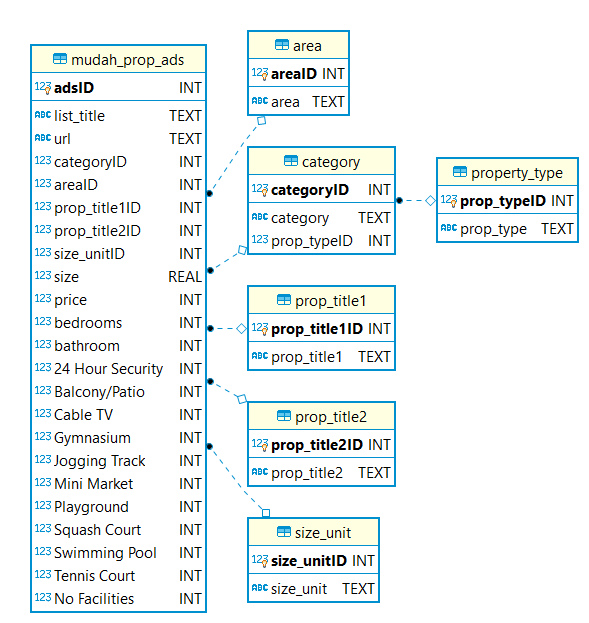

In [16]:
from PIL import Image
Image.open('Q2_SnowFlakeSchema.png')